## 0. Load libaries & Init maze

In [125]:
import numpy as np
import mdp1 as mz
import importlib
importlib.reload(mz)
import sys
stdout = sys.stdout
sys.stdout = stdout
import matplotlib.pyplot as plt


In [45]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])


## 2c)

#### i) Create environment and compute policy

In [51]:
# Horizon
T = 20

# Create an environment maze
env = mz.Maze(maze, T, minotaur_stay=False)

# Solves the shortest path problem using dynamic programming
V, policy = mz.dynamic_programming(env, T)

#### ii) Animate Solution

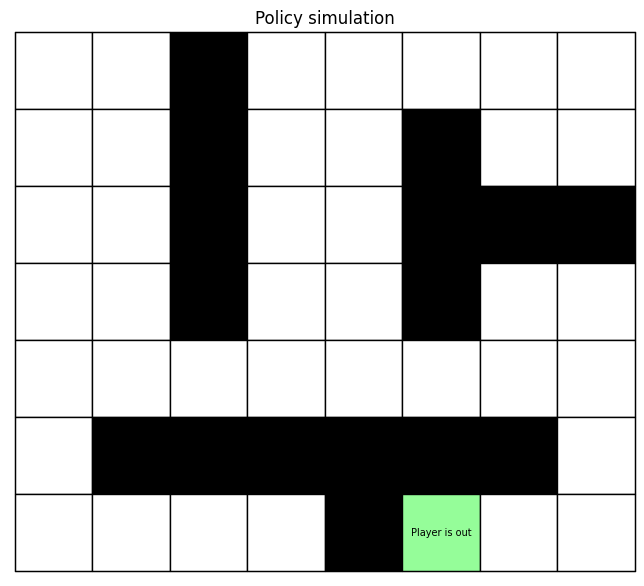

In [52]:
# Method applied
method = 'DynProg'

# Start cell in the maze (player_x, player_y, minotaur_x, minotaur_y)
start = (0, 0, 6, 5)
isWin, isLost, steps, path = env.simulate(start, policy, method)
mz.print_path(path)
# Animate the shortest path
mz.animate_solution(maze, path)


#### iii) Illustrate Policy

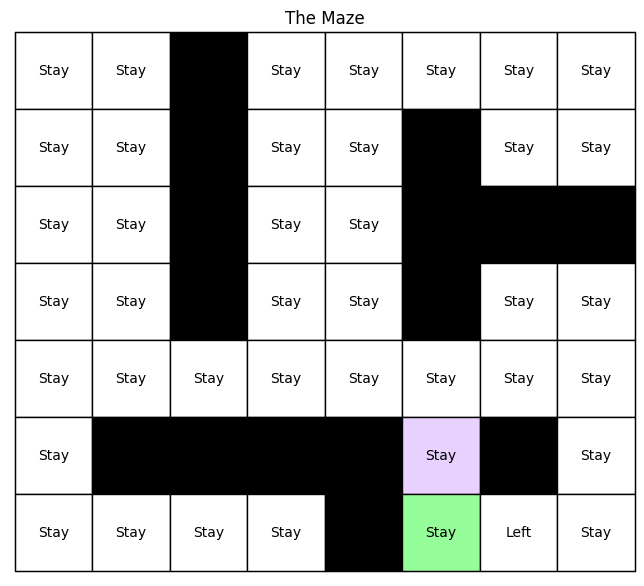

In [60]:
minotaur_pos = (5, 5)
env.draw_path(policy, 19, minotaur_pos)

## 2d)

##### Create environment and policy for Minotaur not allowed to stay

In [126]:
# Horizon
T = 30
# Create an environment maze
env = mz.Maze(maze, T,minotaur_stay=False)
# Solves the shortest path problem using dynamic programming
V, policy = mz.dynamic_programming(env, T)

##### Create environment and policy for Minotaur allowed to stay

In [127]:
# Horizon
T = 30
# Create an environment maze
env_stay = mz.Maze(maze, T, minotaur_stay=True)
# Solves the shortest path problem using dynamic programming
V_stay, policy_stay = mz.dynamic_programming(env_stay, T)

##### Compute P(win) and distribution over number of steps needed to win

In [128]:
# Method applied
method = 'DynProg'
# Compute Probability of exiting the maze
start = (0, 0, 5, 5)
trials = 10000

# minotaur can't stay
prob_win, step_dis_win, step_dis_los = env.compute_prob(
    start, policy, method, trials)
# minotaur allowed to stay
prob_win_stay, step_dis_win_stay, step_dis_los_stay = env_stay.compute_prob(
    start, policy_stay, method, trials)
prob_loose = round(1-prob_win,5)
prob_loose_stay = round(1-prob_win_stay,5)


##### Plot Step Distributions

In [1]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes[0][0].bar(range(len(step_dis_win)), list(
    step_dis_win.values()), align='center', label=f'P(win)={prob_win}')
axes[0][0].legend()
axes[0][0].title.set_text('Winning - Minotaur must move')
axes[0][1].bar(range(len(step_dis_win_stay)), list(
    step_dis_win_stay.values()), align='center', label=f'P(win)={prob_win_stay}')
axes[0][1].legend()
axes[0][1].title.set_text('Winning - Minotaur can stay')
axes[1][0].bar(range(len(step_dis_los)), list(
    step_dis_los.values()), align='center', label=f'P(Loose)={prob_loose}')
axes[1][0].legend()
axes[1][0].title.set_text('Losing - Minotaur must move')
axes[1][1].bar(range(len(step_dis_los_stay)), list(
    step_dis_los_stay.values()), align='center', label=f'P(Loose)={prob_loose_stay}')
axes[1][1].legend()
axes[1][1].title.set_text('Losing - Minotaur can stay')
fig.text(0.5, 0.01, 'test', wrap=True,
            horizontalalignment='center', fontsize=12)





NameError: name 'plt' is not defined